In [1]:
!pip install datasets transformers torch

In [4]:
# import CIFAR-10 dataset from HuggingFace
from datasets import load_dataset

dataset_train = load_dataset(
    'cifar10',
    split='train',
    ignore_verifications=False # set to True if seeing splits Error
)

Found cached dataset cifar10 (C:/Users/pradhumn/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


In [15]:
dataset_train.features

{'img': Image(decode=True, id=None),
 'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)}

In [31]:
dataset_test = load_dataset(
    'cifar10',
    split='test', # testing split
    ignore_verifications=True
)

dataset_test

c:\Users\pradhumn\anaconda3\envs\vicuna\lib\site-packages\datasets\load.py:1748: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(
Found cached dataset cifar10 (C:/Users/pradhumn/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


Dataset({
    features: ['img', 'label'],
    num_rows: 10000
})

In [32]:
set(dataset_train['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [33]:
dataset_train.features['label']

ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)

In [34]:
num_classes = len(set(dataset_train['label']))
labels = dataset_train.features['label']
num_classes, labels

(10,
 ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None))

In [40]:
dataset_train[0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 'label': 0}

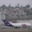

In [41]:
dataset_train[0]['img']  

In [42]:
dataset_train[0]['label'], labels.names[dataset_train[0]['label']]

(0, 'airplane')

##Loading ViT Feature Extractor

In [44]:
from transformers import ViTFeatureExtractor

#import model
model_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(
    model_id
)

In [45]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [47]:
# Passing the Airplane tensor through the feature extractor 
example = feature_extractor(
    dataset_train[0]['img'],
    return_tensors='pt'
)
example

AttributeError: module 'tensorflow' has no attribute 'Tensor'

Python 3.9.16
